In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import stdev as SD 
import scipy.stats as st  #package for statistics
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html


## Read master csv
- This csv file stores the kinetochore positions as a distance from a spindle pole
- C_ refers to the experiment. control and S_ referes to SKAP KO
- Each column in csv is named according this definition: date_cell#_KTpair#. 
- Sister kinetochore pairs denotes by a and b.
- Each row is the measured distance over time (in seconds)

In [4]:
raw_data=pd.read_csv("kinetochore_oscillations_ctrvsSKAP.csv")
printraw_data

,time,C_20191017_001_p1a,C_20191017_001_p1b,C_20191017_002_p1a,C_20191017_002_p1b,C_20191017_004_p1a,C_20191017_004_p1b,C_20191017_004_p2a,C_20191017_004_p2b,C_20191017_004_p3a,...,S_20191107_012_p3a,S_20191107_012_p3b,S_20191107_014_p1a,S_20191107_014_p1b,S_20191107_014_p2a,S_20191107_014_p2b,S_20191107_015_p1a,S_20191107_015_p1b,S_20191107_015_p2a,S_20191107_015_p2b
0,0,7.650804,6.692014,8.392061,7.452909,8.753121,9.553359,8.015913,8.744098,7.944871,...,8.853912,7.772597,5.512557,5.614104,6.892212,7.769542,8.475951,7.152662,8.721556,6.553510
1,3,7.697865,6.902608,8.393108,7.468202,8.855268,9.576962,8.113486,8.850592,7.948096,...,9.130675,7.979824,5.320912,6.498129,6.926857,7.796577,8.357279,7.131261,8.794495,6.591567
2,6,7.792100,7.014417,8.451424,7.514329,8.972146,9.552335,8.230440,8.983296,8.016640,...,8.916051,7.744199,5.139986,6.383791,6.866113,7.757072,8.328104,7.074324,8.858899,6.700912
3,9,7.958760,7.109028,8.464271,7.524221,9.013169,9.689756,8.358219,9.131350,7.893734,...,9.046184,7.896169,4.962348,6.320247,6.808274,7.668663,8.254533,6.975086,8.875063,6.840769
4,12,8.052099,7.224785,8.403672,7.451668,9.129919,9.775948,8.487840,9.290796,7.827874,...,9.002686,7.872220,4.847814,6.249929,6.779318,7.656660,8.197914,6.863031,8.774082,6.813488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
155,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### csv containing the ctrl experiments only

In [5]:
compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])

for column in raw_data:
    if column.startswith("C"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        ctr_kt_names = [column[:-1]] * len(kt_dist)
        ctr_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(ctr_kt_names, ctr_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        compiled_data = pd.concat([compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
compiled_data

,Experiment,KT_sister,Time,KT_dist
0,C_20191017_001_p1,a,0,7.650804
1,C_20191017_001_p1,a,3,7.697865
2,C_20191017_001_p1,a,6,7.792100
3,C_20191017_001_p1,a,9,7.958760
4,C_20191017_001_p1,a,12,8.052099
...,...,...,...,...
4541,C_20191031_017_p3,b,165,6.862165
4542,C_20191031_017_p3,b,168,6.925937
4543,C_20191031_017_p3,b,171,7.011297
4544,C_20191031_017_p3,b,174,6.934630


### Calculate speed of kinetochore movement at every time point (ctrl)

In [6]:
kt_speed_list=[]
for t in range(0,len(compiled_data.KT_dist)-1):
    kt_speed = (60*(compiled_data.KT_dist[t+1] - compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    kt_speed_list.append(kt_speed) #transform the data in a actual phyton list
kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

kt_speed=pd.Series(kt_speed_list) #transform the list in to a series (a column like on a table)


# print(type(kt_speed))
# print(kt_speed)

compiled_data["KT_speed"]=kt_speed #add a new column named (KT_speed) with the data kt_speed
compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,C_20191017_001_p1,a,0,7.650804,NaN
1,C_20191017_001_p1,a,3,7.697865,0.941229
2,C_20191017_001_p1,a,6,7.792100,1.884682
3,C_20191017_001_p1,a,9,7.958760,3.333212
4,C_20191017_001_p1,a,12,8.052099,1.866774
...,...,...,...,...,...
4541,C_20191031_017_p3,b,165,6.862165,2.144142
4542,C_20191031_017_p3,b,168,6.925937,1.275436
4543,C_20191031_017_p3,b,171,7.011297,1.707215
4544,C_20191031_017_p3,b,174,6.934630,-1.533354


### Calculate the standard deviation of the position of each kinetochore over time (ctrl)

In [8]:
ctr_position_stdev=[]#open this to be able to get a list from the above calculations

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()
 

    
    
    
    stdev_pair_a=pair_a['KT_dist'].std()
    stdev_pair_b=pair_b['KT_dist'].std()
    ctr_position_stdev.append(stdev_pair_a)
    ctr_position_stdev.append(stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(ctr_position_stdev)



### velocity correlation between sister kinetochores within a pair (ctrl)

In [10]:
ctr_velocity_correlation=[]

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    ctr_velocity_correlation.append(velocity_correlation)


    
# print(ctr_velocity_correlation)
    

### kinetochore speed calculation (ctr)

In [11]:
ctr_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations



for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()

    
    kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    kt_b_speed_mean_abs=mean(pair_b_abs)
    ctr_kt_speed_mean_abs.append(kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    ctr_kt_speed_mean_abs.append(kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
  

### amount of time sister kinetochore pairs move in opposite directions (ctrl)

In [12]:
ctr_KT_oposite_movement_freq=[]

for i in compiled_data.Experiment.unique():
    pair = compiled_data[compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(speed_multiplication)
    number_oposite=sum(n < 0 for n in speed_multiplication)
#     number_oposite=speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe
    proportion_oposite_movement=100*number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(number_oposite), print(len(pair_a['KT_speed'])), print(proportion_oposite_movement), print(speed_multiplication)
    ctr_KT_oposite_movement_freq.append(proportion_oposite_movement)
print(ctr_KT_oposite_movement_freq)
    
#     print(test), print(number_oposite)

[25.0, 28.571428571428573, 18.627450980392158, 2.9411764705882355, 10.526315789473685, 12.5, 14.634146341463415, 25.0, 19.607843137254903, 6.4935064935064934, 10.126582278481013, 20.0, 15.217391304347826, 10.112359550561798, 11.864406779661017, 16.071428571428573, 18.42105263157895, 37.735849056603776, 11.11111111111111, 28.205128205128204, 21.428571428571427, 24.778761061946902, 20.0, 18.75, 18.75, 14.285714285714286, 19.642857142857142, 26.785714285714285, 16.129032258064516, 20.833333333333332, 10.526315789473685, 12.121212121212121, 17.02127659574468, 10.169491525423728]


### csv containing the SKAP KD experiments only

In [13]:
SKAP_compiled_data = pd.DataFrame(columns = ["Experiment", "KT_sister", "Time", "KT_dist"])



for column in raw_data:
    if column.startswith("S"):
        kt_dist=raw_data[column][raw_data[column].notnull()].tolist()
        SKAP_kt_names = [column[:-1]] * len(kt_dist)
        SKAP_sis_names = [column[-1]] * len(kt_dist)
        time_kt=raw_data["time"][raw_data[column].notnull()].tolist()
#         print(len(time_kt),len(kt_dist))
        zippedList =  list(zip(SKAP_kt_names, SKAP_sis_names, time_kt, kt_dist))
        df_temp = pd.DataFrame(zippedList,columns = ["Experiment", "KT_sister", "Time", "KT_dist"])
        SKAP_compiled_data = pd.concat([SKAP_compiled_data, df_temp], axis=0, sort=False, ignore_index = True)
SKAP_compiled_data

,Experiment,KT_sister,Time,KT_dist
0,S_20191010_002_P1,a,0,8.023027
1,S_20191010_002_P1,a,3,8.013132
2,S_20191010_002_P1,a,6,8.060275
3,S_20191010_002_P1,a,9,8.084201
4,S_20191010_002_P1,a,12,8.108726
...,...,...,...,...
8003,S_20191107_015_p2,b,138,6.925883
8004,S_20191107_015_p2,b,141,6.833103
8005,S_20191107_015_p2,b,144,6.849084
8006,S_20191107_015_p2,b,147,6.758366


### Calculate speed of kinetochore movement at every time point (SKAP KD)

In [14]:
SKAP_kt_speed_list=[]
for t in range(0,len(SKAP_compiled_data.KT_dist)-1):
    SKAP_kt_speed = (60*(SKAP_compiled_data.KT_dist[t+1] - SKAP_compiled_data.KT_dist[t]))/3 #speed calculation from the entire list
#     print(t,kt_speed)
    SKAP_kt_speed_list.append(SKAP_kt_speed) #transform the data in a actual phyton list
SKAP_kt_speed_list.insert(0, np.nan) #insert an empty opsition at the first position (0) of the list

SKAP_kt_speed=pd.Series(SKAP_kt_speed_list) #transform the list in to a series (a column like on a table)


SKAP_compiled_data["KT_speed"]=SKAP_kt_speed #add a new column named (KT_speed) with the data kt_speed
SKAP_compiled_data



,Experiment,KT_sister,Time,KT_dist,KT_speed
0,S_20191010_002_P1,a,0,8.023027,NaN
1,S_20191010_002_P1,a,3,8.013132,-0.197907
2,S_20191010_002_P1,a,6,8.060275,0.942868
3,S_20191010_002_P1,a,9,8.084201,0.478505
4,S_20191010_002_P1,a,12,8.108726,0.490512
...,...,...,...,...,...
8003,S_20191107_015_p2,b,138,6.925883,10.297403
8004,S_20191107_015_p2,b,141,6.833103,-1.855605
8005,S_20191107_015_p2,b,144,6.849084,0.319618
8006,S_20191107_015_p2,b,147,6.758366,-1.814352


### Calculate the standard deviation of the position of each kinetochore over time (SKAP KD)

In [16]:
SKAP_position_stdev=[]#open this to be able to get a list from the above calculations

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_dist']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_dist']
    pair_b = pair_b.reset_index()

   
      
    SKAP_stdev_pair_a=pair_a['KT_dist'][1:].std()
    SKAP_stdev_pair_b=pair_b['KT_dist'][1:].std()
    SKAP_position_stdev.append(SKAP_stdev_pair_a)
    SKAP_position_stdev.append(SKAP_stdev_pair_b)
#     print(stdev_pair_a,stdev_pair_b)

# print(SKAP_position_stdev)



### velocity correlation between sister kinetochores within a pair (SKAP KD)

In [17]:
SKAP_velocity_correlation=[]

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b


    
    velocity_correlation=pair_a["KT_speed"][1:].corr(pair_b["KT_speed"][1:], method='spearman')
    SKAP_velocity_correlation.append(velocity_correlation)

    

### kinetochore speed calculation (SKAP KD)

In [18]:
SKAP_kt_speed_mean_abs=[] #open this to be able to get a list from the above calculations


for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

#     print(pair_a)
    pair_a_abs=pair_a['KT_speed'][1:].abs()
    pair_b_abs=pair_b['KT_speed'][1:].abs()
#     print(pair_a)
    
    SKAP_kt_a_speed_mean_abs=mean(pair_a_abs) #getting the average speed of each kinetochore (first the a and then the b) 
    SKAP_kt_b_speed_mean_abs=mean(pair_b_abs)
    SKAP_kt_speed_mean_abs.append(SKAP_kt_a_speed_mean_abs) #add the 2 groups of KT_speed average to the same list, so I can plot it together and also keep and refear to the data once out of the loop
    SKAP_kt_speed_mean_abs.append(SKAP_kt_b_speed_mean_abs)

#     print(kt_a_speed_mean,kt_b_speed_mean)
 

### amount of time sister kinetochore pairs move in opposite directions (SKAP KD)

In [19]:
SKAP_KT_oposite_movement_freq=[]

for i in SKAP_compiled_data.Experiment.unique():
    pair = SKAP_compiled_data[SKAP_compiled_data['Experiment'] == i]
    pair_a = pair.loc[(pair['KT_sister'] == 'a'),'KT_speed']
    pair_a = pair_a.reset_index() #foce the index to restart at 0 for each kinetochore (at the first position of the column). THIS IS ESSENTIAL FOR LATTER TO BE ABLE TO DO CALCULATIONS IN WHICH I'M COMPARING THE 2 KINETOCHORES WITHIN A PAIR!
    pair_b = pair.loc[(pair['KT_sister'] == 'b'),'KT_speed']
    pair_b = pair_b.reset_index()
    SKAP_compiled_data.at[pair_a.index[0], 'KT_speed'] = np.nan  #eliminate (create an non value cell, it has to be NAN instead of an empy string (means a word)) the first value of speed for each kinetochore a
    SKAP_compiled_data.at[pair_b.index[0], 'KT_speed'] = np.nan  ##eliminate create an non value cell, it has to be NAN instead of an empy string (means a word))the first value of speed for each kinetochore b

    SKAP_speed_multiplication=pair_a['KT_speed'][1:]*pair_b['KT_speed'][1:] #to get the ooposite ovement as a negative value(+*-=-)
#     print(SKAP_speed_multiplication)
    SKAP_number_oposite=sum(n < 0 for n in SKAP_speed_multiplication)
#     SKAP_number_oposite=SKAP_speed_multiplication.lt(0).sum().sum() # complicated option that I do not understand obtained from https://stackoverflow.com/questions/36155942/need-count-of-negative-values-in-a-dataframe

    SKAP_proportion_oposite_movement=100*SKAP_number_oposite/len(pair_a["KT_speed"][1:]) #to get the percentage
#     print(SKAP_number_oposite), print(len(pair_a['KT_speed'])), print(SKAP_proportion_oposite_movement), print(SKAP_speed_multiplication)
    SKAP_KT_oposite_movement_freq.append(SKAP_proportion_oposite_movement)
print(SKAP_KT_oposite_movement_freq)


[31.03448275862069, 30.303030303030305, 26.666666666666668, 33.333333333333336, 32.30769230769231, 35.8974358974359, 22.0, 36.144578313253014, 31.428571428571427, 19.444444444444443, 14.285714285714286, 27.906976744186046, 37.5, 16.455696202531644, 21.05263157894737, 32.30769230769231, 40.0, 24.528301886792452, 35.18518518518518, 20.58823529411765, 24.193548387096776, 14.285714285714286, 34.0, 28.571428571428573, 36.8421052631579, 33.333333333333336, 18.96551724137931, 18.333333333333332, 6.944444444444445, 18.9873417721519, 24.489795918367346, 28.431372549019606, 37.5, 26.984126984126984, 14.285714285714286, 36.58536585365854, 24.65753424657534, 40.57971014492754, 32.0, 45.283018867924525, 42.592592592592595, 46.08695652173913, 28.089887640449437, 17.741935483870968, 36.42384105960265, 37.5, 33.08270676691729, 42.96875, 27.027027027027028, 24.324324324324323, 26.53061224489796, 32.78688524590164, 18.095238095238095, 34.48275862068966, 37.3134328358209, 27.956989247311828, 30.0]


## Plotting

P_norm_ctr = 0.356927
normal distribution; The null hypothesis cannot be rejected
P_norm_SKAP = 0.0851039
normal distribution; The null hypothesis cannot be rejected
SKAPvsCTR_MeanSpeed_pvalue
3.929134738954319e-13
control speed mean
1.7906515116654513
SKAP speed mean
1.248728738889841
controls standard deviation
0.4436018548323115
SKAP standard deviation
0.3636973586279852


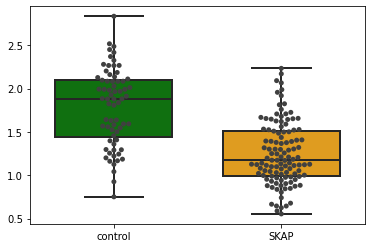

In [22]:
#Speed mean graph

samples_names=['control', 'SKAP'] #create a list of the names of the samples (for the axis)
x_axis=list(range(len(samples_names))) #create a list as long as the samples_names list (from 0 to x)
# print(x_axis)
# print(samples_names)
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data= [ctr_kt_speed_mean_abs, SKAP_kt_speed_mean_abs], linewidth=2, width=0.7, palette=["green", "orange"]) #to create a boxplot, width=box width, palette changes colors of individual samples, instead, color changes all of them
sns.swarmplot(data= [ctr_kt_speed_mean_abs, SKAP_kt_speed_mean_abs], color=".25") #to insert the acuall dots in the boxplot
plt.xticks([]) #empty the samples names axis
# plt.yticks([])
plt.xticks(x_axis, samples_names) #add the samples names in the positions of x_axis list in the x axis
# plt.xticks([0,1,2], ['control', 'SKAP', 'mg132'])  #another way to do the same, les lines but worst coding practice
plt.tick_params(axis='both', which='major', labelsize=10) # to change the leter size
plt.savefig('KTvelocity_ctrVSskap.eps', format='eps')


#STATISTICS:
#normality test using  D'Agostino-Pearson (omnibus K2) # from https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
alpha = 1e-3
k2, P_norm_ctr = st.normaltest(ctr_kt_speed_mean_abs) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_ctr = {:g}".format(P_norm_ctr))
# print(alpha)
if P_norm_ctr < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")

k2, P_norm_SKAP = st.normaltest(SKAP_kt_speed_mean_abs) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_SKAP = {:g}".format(P_norm_SKAP))
# print(alpha)
if P_norm_SKAP < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")
    

    
#mann-withney tests  # from https://pythonhealthcare.org/2018/04/13/53-statistics-mann-whitney-u-test/
statistic, SKAPvsCTR_MeanSpeed_pvalue = st.mannwhitneyu(ctr_kt_speed_mean_abs, SKAP_kt_speed_mean_abs, use_continuity=True, alternative='two-sided')
print('SKAPvsCTR_MeanSpeed_pvalue')
print(SKAPvsCTR_MeanSpeed_pvalue)
ctr_kt_speed_mean_abs_mean=mean(ctr_kt_speed_mean_abs)
print("control speed mean")
print(ctr_kt_speed_mean_abs_mean)
SKAP_kt_speed_mean_abs_mean=mean(SKAP_kt_speed_mean_abs)
print("SKAP speed mean")
print(SKAP_kt_speed_mean_abs_mean)

ctr_kt_speed_mean_abs_sd=SD(ctr_kt_speed_mean_abs)
print("controls standard deviation")
print(ctr_kt_speed_mean_abs_sd)
SKAP_kt_speed_mean_abs_sd=SD(SKAP_kt_speed_mean_abs)
print("SKAP standard deviation")
print(SKAP_kt_speed_mean_abs_sd)


P_norm_ctr = 0.161013
normal distribution; The null hypothesis cannot be rejected
P_norm_SKAP = 0.110204
normal distribution; The null hypothesis cannot be rejected
SKAPvsCTR_SDev_pvalue
3.961382418623208e-08
control SD mean
0.5600245116406902
SKAP SD mean
0.3775719258421964
controls standard deviation
0.22174368889097637
SKAP standard deviation
0.17423965767951669


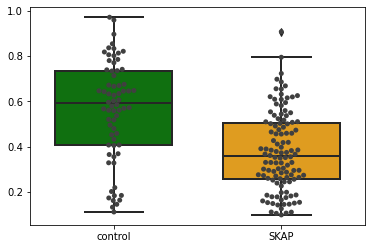

In [23]:
#standard desviation of the postition graph

samples_names=['control', 'SKAP'] #create a list of the names of the samples (for the axis)
x_axis=list(range(len(samples_names))) #create a list as long as the samples_names list (from 0 to x)
# print(x_axis)
# print(samples_names)
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data= [ctr_position_stdev, SKAP_position_stdev], linewidth=2, width=0.7, palette=["green", "orange"]) #to create a boxplot, width=box width, palette changes colors of individual samples, instead, color changes all of them
sns.swarmplot(data= [ctr_position_stdev, SKAP_position_stdev], color=".25") #to insert the acuall dots in the boxplot
plt.xticks([]) #empty the samples names axis
# plt.yticks([])
plt.xticks(x_axis, samples_names) #add the samples names in the positions of x_axis list in the x axis
# plt.xticks([0,1,2], ['control', 'SKAP', 'mg132'])  #another way to do the same, les lines but worst coding practice
plt.tick_params(axis='both', which='major', labelsize=10) # to change the leter size
plt.savefig('stdevPosition_ctrVSskap.jpg')


#STATISTICS:
#normality test using  D'Agostino-Pearson (omnibus K2)
alpha = 1e-3
k2, P_norm_ctr = st.normaltest(ctr_position_stdev) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_ctr = {:g}".format(P_norm_ctr))
# print(alpha)
if P_norm_ctr < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")

k2, P_norm_SKAP = st.normaltest(SKAP_position_stdev) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_SKAP = {:g}".format(P_norm_SKAP))
# print(alpha)
if P_norm_SKAP < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")
 
    
#mann-withney tests
statistic, SKAPvsCTR_SDev_pvalue = st.mannwhitneyu(ctr_position_stdev, SKAP_position_stdev, use_continuity=True, alternative='two-sided')
print('SKAPvsCTR_SDev_pvalue')
print(SKAPvsCTR_SDev_pvalue)
ctr_position_stdev_mean=mean(ctr_position_stdev)
print("control SD mean")
print(ctr_position_stdev_mean)
SKAP_position_stdev_mean=mean(SKAP_position_stdev)
print("SKAP SD mean")
print(SKAP_position_stdev_mean)

ctr_position_stdev_sd=SD(ctr_position_stdev)
print("controls standard deviation")
print(ctr_position_stdev_sd)
SKAP_position_stdev_sd=SD(SKAP_position_stdev)
print("SKAP standard deviation")
print(SKAP_position_stdev_sd)



P_norm_ctr = 0.236622
normal distribution; The null hypothesis cannot be rejected
P_norm_SKAP = 0.595195
normal distribution; The null hypothesis cannot be rejected
SKAPvsCTR_OD_pvalue
8.627581327016375e-08
control oposite movement frequency mean
17.470278150031348
SKAP oposite movement frequency mean
29.06364933556057
control oposite movement frequency sd
7.175560880851856
SKAP oposite movement frequency sd
8.671788355261453


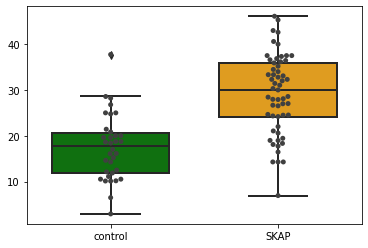

In [24]:
#frequence of oposite_movement graph (%)


samples_names=['control', 'SKAP'] #create a list of the names of the samples (for the axis)
x_axis=list(range(len(samples_names))) #create a list as long as the samples_names list (from 0 to x)
# print(x_axis)
# print(samples_names)
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data= [ctr_KT_oposite_movement_freq, SKAP_KT_oposite_movement_freq], linewidth=2, width=0.7, palette=["green", "orange"]) #to create a boxplot, width=box width, palette changes colors of individual samples, instead, color changes all of them
sns.swarmplot(data= [ctr_KT_oposite_movement_freq, SKAP_KT_oposite_movement_freq], color=".25") #to insert the acuall dots in the boxplot
plt.xticks([]) #empty the samples names axis
# plt.yticks([])
plt.xticks(x_axis, samples_names) #add the samples names in the positions of x_axis list in the x axis
# plt.xticks([0,1,2], ['control', 'SKAP', 'mg132'])  #another way to do the same, les lines but worst coding practice
plt.tick_params(axis='both', which='major', labelsize=10) # to change the leter size
plt.savefig('OpositeMovFreq_ctrVSskap')


#STATISTICS:
#normality test using  D'Agostino-Pearson (omnibus K2)
alpha = 1e-3
k2, P_norm_ctr = st.normaltest(ctr_KT_oposite_movement_freq) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_ctr = {:g}".format(P_norm_ctr))
# print(alpha)
if P_norm_ctr < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")

k2, P_norm_SKAP = st.normaltest(SKAP_KT_oposite_movement_freq) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_SKAP = {:g}".format(P_norm_SKAP))
# print(alpha)
if P_norm_SKAP < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")
   
    
#mann-withney tests
statistic, SKAPvsCTR_OD_pvalue = st.mannwhitneyu(ctr_KT_oposite_movement_freq, SKAP_KT_oposite_movement_freq, use_continuity=True, alternative='two-sided')
print('SKAPvsCTR_OD_pvalue')
print(SKAPvsCTR_OD_pvalue)

ctr_KT_oposite_movement_freq_mean=mean(ctr_KT_oposite_movement_freq)
print("control oposite movement frequency mean")
print(ctr_KT_oposite_movement_freq_mean)
SKAP_KT_oposite_movement_freq_mean=mean(SKAP_KT_oposite_movement_freq)
print("SKAP oposite movement frequency mean")
print(SKAP_KT_oposite_movement_freq_mean)

ctr_KT_oposite_movement_freq_sd=SD(ctr_KT_oposite_movement_freq)
print("control oposite movement frequency sd")
print(ctr_KT_oposite_movement_freq_sd)
SKAP_KT_oposite_movement_freq_sd=SD(SKAP_KT_oposite_movement_freq)
print("SKAP oposite movement frequency sd")
print(SKAP_KT_oposite_movement_freq_sd)




P_norm_ctr = 0.00048328
non normal distribution; The null hypothesis can be rejected
P_norm_SKAP = 0.0932616
normal distribution; The null hypothesis cannot be rejected
SKAPvsCTR_VelCorr_pvalue
2.3091749176447184e-07
controls velocity correlation mean
0.7424245102945893
SKAP velocity correlation mean
0.5459775936762294
controls velocity correlation sd
0.12346277379563826
SKAP velocity correlation sd
0.18069236319418183


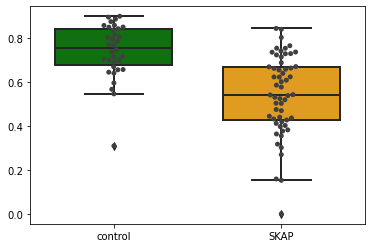

In [25]:
#velocity correlation graph


samples_names=['control', 'SKAP'] #create a list of the names of the samples (for the axis)
x_axis=list(range(len(samples_names))) #create a list as long as the samples_names list (from 0 to x)
# print(x_axis)
# print(samples_names)
import seaborn as sns # package for boxplot, info at https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(data= [ctr_velocity_correlation, SKAP_velocity_correlation], linewidth=2, width=0.7, palette=["green", "orange"]) #to create a boxplot, width=box width, palette changes colors of individual samples, instead, color changes all of them
sns.swarmplot(data= [ctr_velocity_correlation, SKAP_velocity_correlation], color=".25") #to insert the acuall dots in the boxplot
plt.xticks([]) #empty the samples names axis
# plt.yticks([])
plt.xticks(x_axis, samples_names) #add the samples names in the positions of x_axis list in the x axis
# plt.xticks([0,1,2], ['control', 'SKAP', 'mg132'])  #another way to do the same, les lines but worst coding practice
plt.tick_params(axis='both', which='major', labelsize=10) # to change the leter size
plt.savefig('VelCorrel_ctrVSskap')

#STATISTICS:
#normality test using  D'Agostino-Pearson (omnibus K2)
alpha = 1e-3
k2, P_norm_ctr = st.normaltest(ctr_velocity_correlation) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_ctr = {:g}".format(P_norm_ctr))
# print(alpha)
if P_norm_ctr < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")

k2, P_norm_SKAP = st.normaltest(SKAP_velocity_correlation) #normality test using  D'Agostino-Pearson (omnibus K2)
print("P_norm_SKAP = {:g}".format(P_norm_SKAP))
# print(alpha)
if P_norm_SKAP < alpha:  # null hypothesis: Variable comes from a normal distribution
    print("non normal distribution; The null hypothesis can be rejected")
else:
    print("normal distribution; The null hypothesis cannot be rejected")
    
   
    
#mann-withney tests
statistic, SKAPvsCTR_VelCorr_pvalue = st.mannwhitneyu(ctr_velocity_correlation, SKAP_velocity_correlation, use_continuity=True, alternative='two-sided')
print('SKAPvsCTR_VelCorr_pvalue')
print(SKAPvsCTR_VelCorr_pvalue)

ctr_velocity_correlation_mean=mean(ctr_velocity_correlation)
print("controls velocity correlation mean")
print(ctr_velocity_correlation_mean)
SKAP_velocity_correlation_mean=mean(SKAP_velocity_correlation)
print("SKAP velocity correlation mean")
print(SKAP_velocity_correlation_mean)

ctr_velocity_correlation_sd=SD(ctr_velocity_correlation)
print("controls velocity correlation sd")
print(ctr_velocity_correlation_sd)
SKAP_velocity_correlation_sd=SD(SKAP_velocity_correlation)
print("SKAP velocity correlation sd")
print(SKAP_velocity_correlation_sd)

